<a href="https://colab.research.google.com/github/ANANTHA-KRISHNA-J/Demand-Forecasting/blob/main/Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import root_mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_csv('train_0irEZ2H.csv')
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [ ]:
df[['day', 'month','year']] = df['week'].str.split('/',expand=True)
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [ ]:
df = df.drop(columns=['week','record_ID'],axis=1)
df.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [ ]:
X = df.drop('units_sold',axis=1)
y = df.units_sold

In [ ]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25,random_state=42)

In [ ]:
print( X_train.shape , y_train.shape , X_test.shape  , y_test.shape)

(112612, 9) (112612,) (37538, 9) (37538,)


In [ ]:
model = RFR()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7708997509555526

In [ ]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred,y_test)
rmse

27.655341118797246

In [ ]:
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


<Axes: >

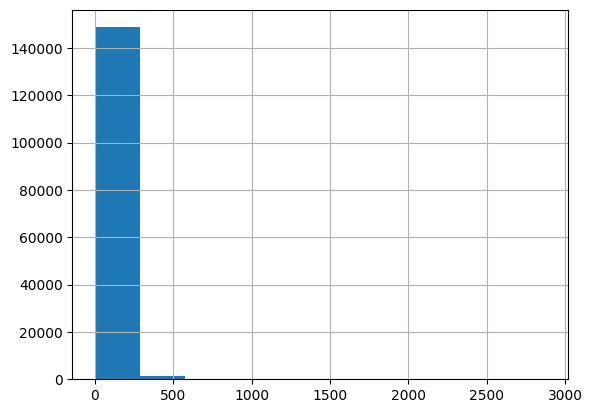

In [ ]:
df.units_sold.hist()

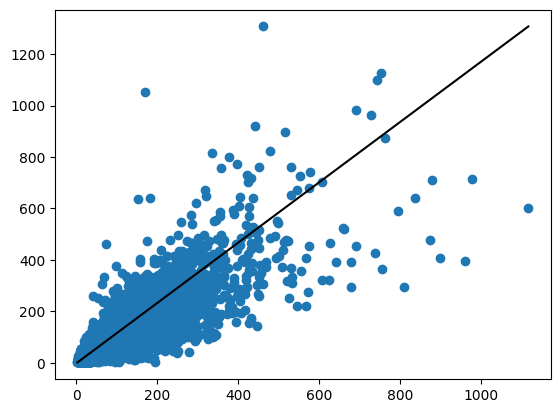

In [ ]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()), np.linspace(y_test.min(),y_test.max()),color = 'black')

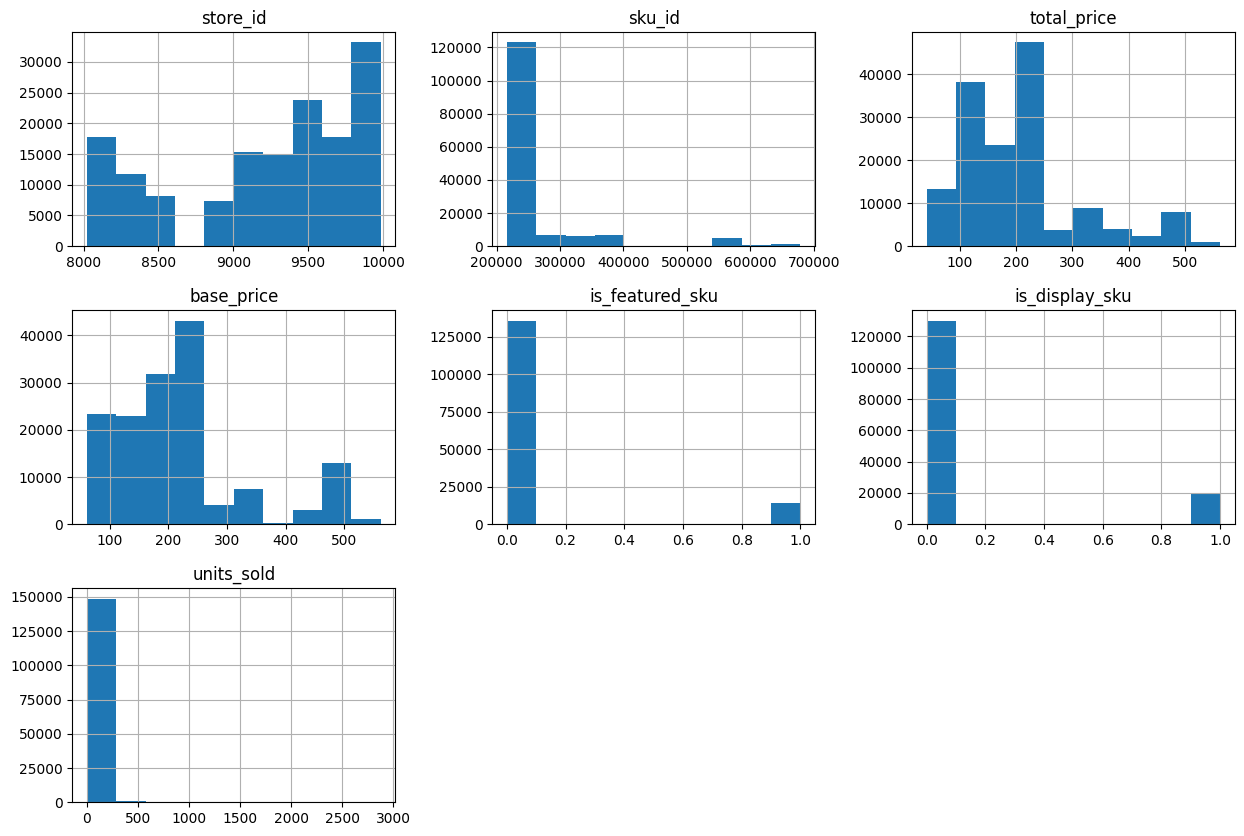

In [ ]:
df.hist(figsize=(15,10))
plt.show()

In [ ]:
len(df.store_id.unique())

76

In [ ]:
len(df.sku_id.unique())

28

In [ ]:
df.units_sold.quantile(0.99)

283.0

In [ ]:
df = df[df.units_sold < df.units_sold.quantile(0.99) ]

<Axes: >

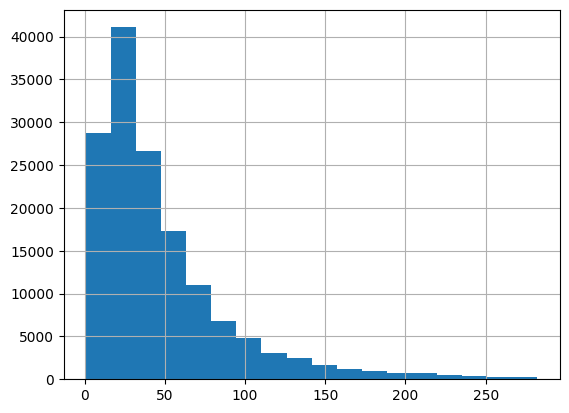

In [ ]:
df.units_sold.hist(bins=18)

In [ ]:
df = df.join(pd.get_dummies(df.store_id,prefix='store')).drop('store_id',axis=1)
df = df.join(pd.get_dummies(df.sku_id,prefix='item')).drop('sku_id',axis=1)

In [ ]:
df.tail()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,store_8063,store_8091,store_8094,store_8095,store_8121,store_8218,store_8222,store_8317,store_8319,store_8392,store_8398,store_8400,store_8422,store_8438,store_8555,store_8562,store_8869,store_8911,store_8991,store_9001,store_9043,store_9092,store_9112,store_9132,store_9147,store_9164,store_9178,store_9190,store_9221,store_9250,store_9273,store_9279,store_9281,store_9328,store_9371,store_9425,store_9430,store_9432,store_9436,store_9439,...,store_9680,store_9700,store_9713,store_9731,store_9745,store_9770,store_9789,store_9809,store_9813,store_9823,store_9837,store_9845,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984,item_216233,item_216418,item_216419,item_216425,item_217217,item_217390,item_217777,item_219009,item_219029,item_219844,item_222087,item_222765,item_223153,item_223245,item_245338,item_245387,item_300021,item_300291,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
150149,234.4125,234.4125,0,0,15,09,07,13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
X,y = df.drop('units_sold',axis=1),df['units_sold']
model1 = RFR(n_jobs = 1)
X_train1,X_test1,y_train1,y_test1 = tts(X,y,test_size=0.25,random_state = 42)

In [ ]:
print( X_train1.shape , y_train1.shape , X_test1.shape  , y_test1.shape)

(111477, 111) (111477,) (37159, 111) (37159,)


In [ ]:
model1.fit(X_train1,y_train1)
model1.score(X_test1,y_test1)

0.8224699776390683

In [ ]:
y_pred1 = model1.predict(X_test1)
rmse1 = root_mean_squared_error(y_pred1,y_test1)
rmse1

17.922360273536206

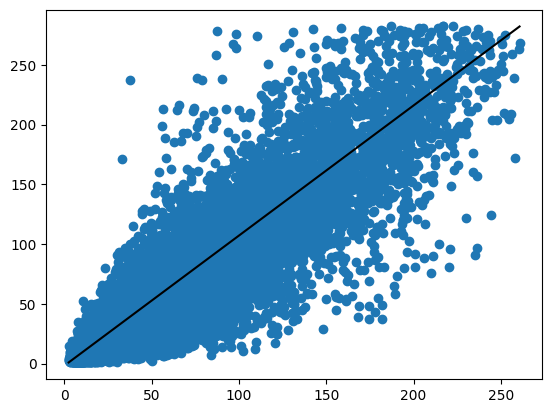

In [ ]:
plt.scatter(y_pred1,y_test1)
plt.plot(np.linspace(y_pred1.min(),y_pred1.max()), np.linspace(y_test1.min(),y_test1.max()),color = 'black')

In [ ]:
param_grid = {
    'n_estimators' : [10,20],
    'min_samples_split' : [2,3,4]
}
model = RFR(n_jobs=1)
grid_search = GridSearchCV(model1,param_grid=param_grid,verbose=2,cv=3)
grid_search.fit(X_train1,y_train1)
best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.7s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  14.2s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  14.0s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  27.3s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  27.5s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  28.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  13.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  13.3s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  13.8s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  26.1s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  26.9s
[CV] END ...............min_samples_split=3, n_es

{'min_samples_split': 3, 'n_estimators': 20}

In [ ]:
best_model.score(X_test1,y_test1)

0.8165425002440989

In [ ]:
best_model

RandomForestRegressor(min_samples_split=3, n_estimators=20, n_jobs=1)